In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Clean Data

In [2]:
# read csv file
data = pd.read_csv('survey.csv')

In [3]:
# first glance at the data
data.info()
data.head()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [4]:
data.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [5]:
# check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


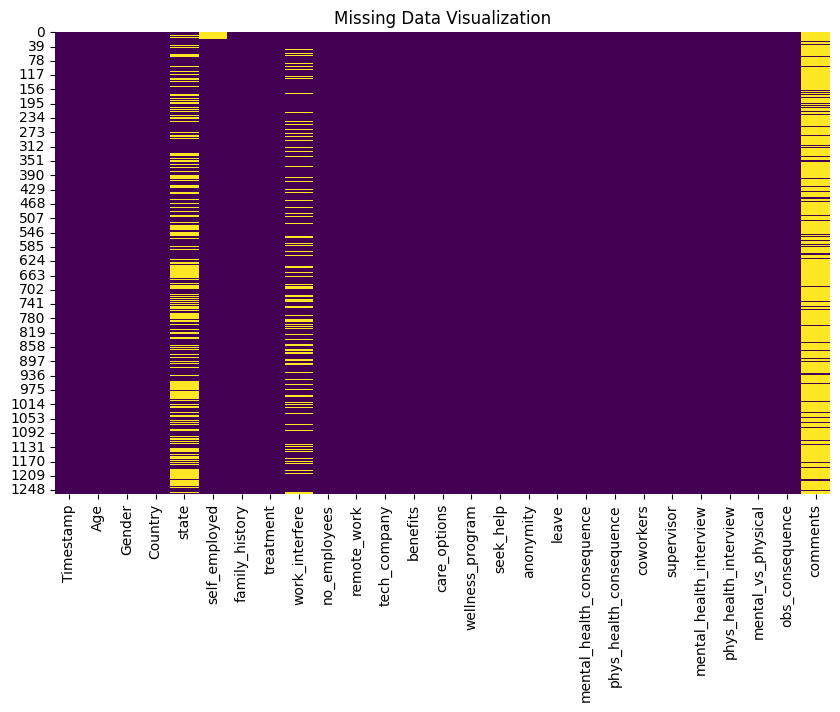

In [6]:
# visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Visualization")
plt.show()

In [7]:
cleaned_data = data.dropna(subset = ['state'])
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  744 non-null    object
 1   Age                        744 non-null    int64 
 2   Gender                     744 non-null    object
 3   Country                    744 non-null    object
 4   state                      744 non-null    object
 5   self_employed              733 non-null    object
 6   family_history             744 non-null    object
 7   treatment                  744 non-null    object
 8   work_interfere             602 non-null    object
 9   no_employees               744 non-null    object
 10  remote_work                744 non-null    object
 11  tech_company               744 non-null    object
 12  benefits                   744 non-null    object
 13  care_options               744 non-null    object
 14  wellness_

In [8]:
cleaned_data = cleaned_data.drop('comments', axis=1)

In [9]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  744 non-null    object
 1   Age                        744 non-null    int64 
 2   Gender                     744 non-null    object
 3   Country                    744 non-null    object
 4   state                      744 non-null    object
 5   self_employed              733 non-null    object
 6   family_history             744 non-null    object
 7   treatment                  744 non-null    object
 8   work_interfere             602 non-null    object
 9   no_employees               744 non-null    object
 10  remote_work                744 non-null    object
 11  tech_company               744 non-null    object
 12  benefits                   744 non-null    object
 13  care_options               744 non-null    object
 14  wellness_

In [10]:
cleaned_data = cleaned_data.drop('Timestamp', axis=1)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        744 non-null    int64 
 1   Gender                     744 non-null    object
 2   Country                    744 non-null    object
 3   state                      744 non-null    object
 4   self_employed              733 non-null    object
 5   family_history             744 non-null    object
 6   treatment                  744 non-null    object
 7   work_interfere             602 non-null    object
 8   no_employees               744 non-null    object
 9   remote_work                744 non-null    object
 10  tech_company               744 non-null    object
 11  benefits                   744 non-null    object
 12  care_options               744 non-null    object
 13  wellness_program           744 non-null    object
 14  seek_help

In [11]:
# check for duplicates
duplicates = cleaned_data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [12]:
# assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# create lists by data type
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# clean the NaN's
for feature in cleaned_data:
    if feature in intFeatures:
        cleaned_data[feature] = cleaned_data[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        cleaned_data[feature] = cleaned_data[feature].fillna(defaultString)
    elif feature in floatFeatures:
        cleaned_data[feature] = cleaned_data[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
cleaned_data.head(5)   

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No


In [13]:
 # clean gender column
gender = cleaned_data['Gender'].str.lower()
#print(gender)

In [14]:
# group genders
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in cleaned_data.iterrows():

    if str.lower(col.Gender) in male_str:
        cleaned_data['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        cleaned_data['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        cleaned_data['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

# remove unnecessary inputs
del_list = ['A little about you', 'p']
cleaned_data = cleaned_data[~cleaned_data['Gender'].isin(del_list)]

print(cleaned_data['Gender'].unique())

['female' 'male' 'trans']


In [15]:
# complete missing age with mean
cleaned_data['Age'].fillna(cleaned_data['Age'].median(), inplace = True)

# fill with median values < 18 and > 120
s = pd.Series(cleaned_data['Age'])
s[s<18] = cleaned_data['Age'].median()
cleaned_data['Age'] = s
s = pd.Series(cleaned_data['Age'])
s[s>120] = cleaned_data['Age'].median()
cleaned_data['Age'] = s

# ranges of age
cleaned_data['age_range'] = pd.cut(cleaned_data['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [16]:
# replace NaN with No for self employed
cleaned_data['self_employed'] = cleaned_data['self_employed'].replace([defaultString], 'No')
print(cleaned_data['self_employed'].unique())

['No' 'Yes']


In [17]:
# replace NaN with Don't Know for work_interfere

cleaned_data['work_interfere'] = cleaned_data['work_interfere'].replace([defaultString], 'Don\'t know' )
print(cleaned_data['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [18]:
cleaned_data.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37,female,United States,IL,No,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,31-65
1,44,male,United States,IN,No,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,31-65
4,31,male,United States,TX,No,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,31-65
5,33,male,United States,TN,No,Yes,No,Sometimes,6-25,No,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,31-65
6,35,female,United States,MI,No,Yes,Yes,Sometimes,1-5,Yes,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,31-65


In [19]:
# save cleaned data
cleaned_file_path = "cleaned_mental_health_in_tech.csv"
cleaned_data.to_csv(cleaned_file_path, index=False)
print("Cleaned dataset saved.")

Cleaned dataset saved.


# Exploratory Data Analysis (EDA)

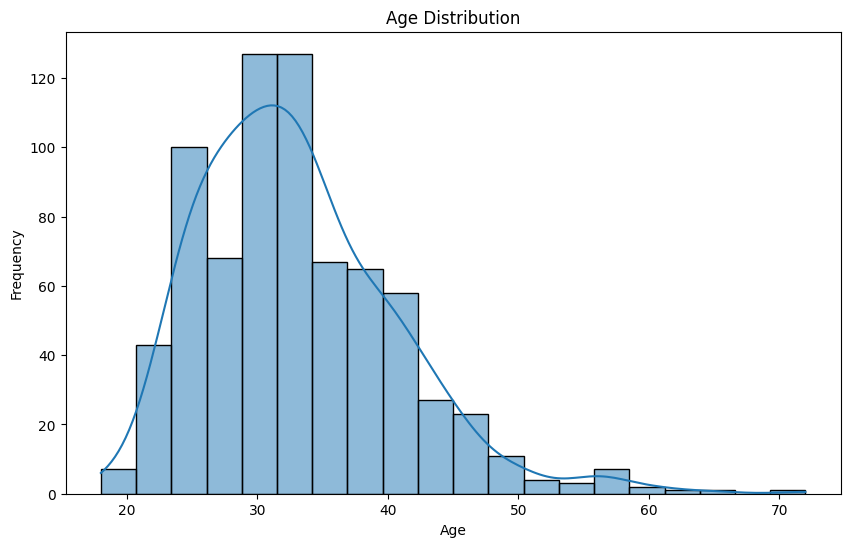

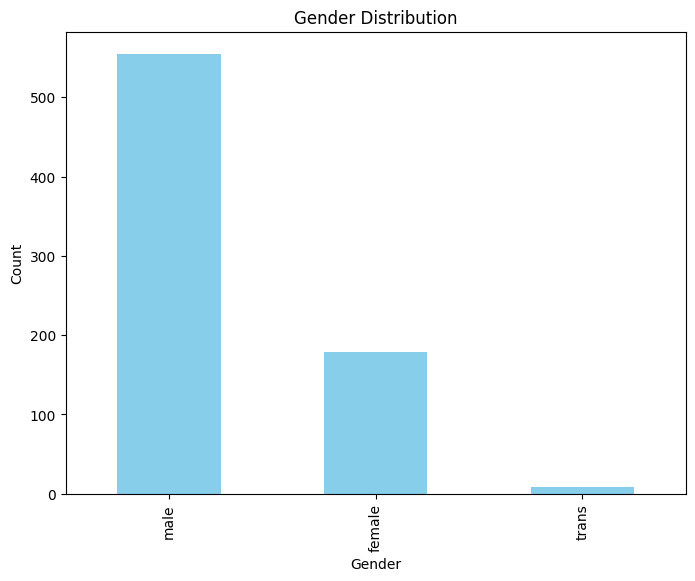

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# age distribution
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# gender breakdown
plt.figure(figsize=(8, 6))
gender_counts = cleaned_data['Gender'].value_counts()
gender_counts.plot(kind='bar', color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

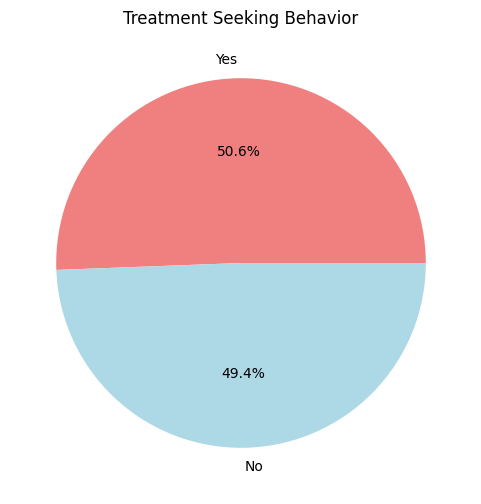

C:\Users\Brian Tran\AppData\Local\Temp\ipykernel_22372\2311527231.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='work_interfere', data=data, order=data['work_interfere'].value_counts().index, palette='coolwarm')


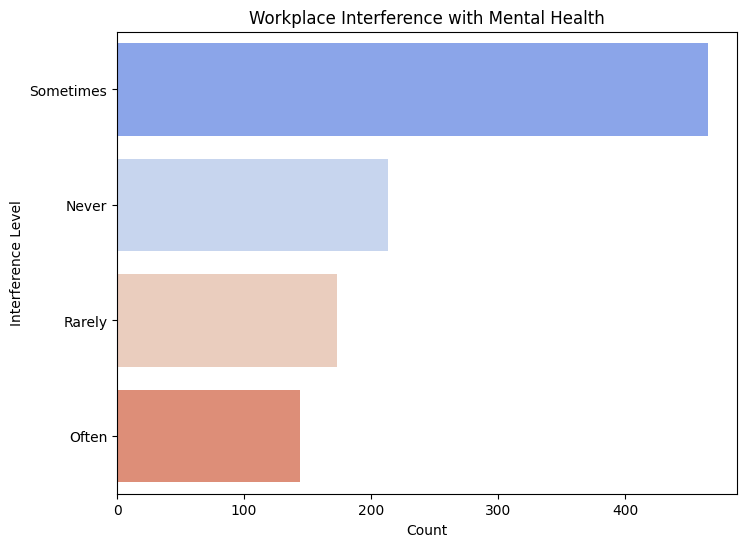

In [21]:
# treatment seeking behavior
treatment_counts = data['treatment'].value_counts()
plt.figure(figsize=(6, 6))
treatment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Treatment Seeking Behavior')
plt.ylabel('')
plt.show()

# work interference
plt.figure(figsize=(8, 6))
sns.countplot(y='work_interfere', data=data, order=data['work_interfere'].value_counts().index, palette='coolwarm')
plt.title('Workplace Interference with Mental Health')
plt.xlabel('Count')
plt.ylabel('Interference Level')
plt.show()